# Signals & Systems Project Phase1
### Kiarash Gheisari Pour

---

## Question 1.1 : Modeling noise in discrete time domain

#### 1 : Gaussian noise (white)
A white gaussian noise on the signal represents $ \text{Noise}[n] \sim \mathcal{N}(0, \sigma^2)$ , which means that each of the indexes are a sample of a gaussian distribution with zero mean and an unknown variance.<br>
the white part means that it has a constant power spectral density across all frequencies, meaning it contains equal power in any frequency band.

Mathematically, a discrete-time WGN sequence satisfies:
- **Zero Mean**: $ E[w[n]] = 0 $
- **Uncorrelated Samples**: $ E[w[n] w[m]] = \sigma^2 \delta[n - m] $, where $ \delta[n] $ is the Kronecker delta function.
- **Gaussian Distribution**: $ w[n] \sim \mathcal{N}(0, \sigma^2) $, where $ \sigma^2 $ is the variance.

#### 2 : Uniform noise 
Uniform noise is a type of random signal where each sample is independently drawn from a uniform probability distribution. <br>
meaning : $ \text{Noise}[n] \sim \mathcal{\text{Uniform}}(-A,A)$<br>
$$
  p_U(x) = 
  \begin{cases} 
  \frac{1}{2A} & \text{if } -A \leq x \leq A \\
  0 & \text{otherwise}
  \end{cases}
$$

#### 4 : Impulse noise 
Impulse noise is often modeled using a **Bernoulli-Gaussian** process:
$
i[n] = b[n] \cdot g[n]
$
where:
- $ b[n] $ = Bernoulli random variable (1 with probability $ p $, 0 with probability $ 1-p $),
- $ g[n] $ = Gaussian (or uniform) random variable (determines impulse amplitude).

##### **Key Parameters:**
- **Probability of occurrence ($ p $)**: Likelihood that any given sample is corrupted.
- **Amplitude distribution**: Can be fixed (e.g., ±A) or random (e.g., Gaussian-distributed).

#### 5 : Power Line noise

A power line noise signal in discrete time can be modeled as:
$$
p[n] = A_0 \sin(2\pi f_0 nT_s + \phi_0) + \sum_{k=2}^{K} A_k \sin(2\pi k f_0 nT_s + \phi_k)
$$
where:
- $ f_0 = 50 \text{ or } 60 \text{ Hz} $ (fundamental frequency),
- $ T_s = \frac{1}{f_s} $ (sampling period),
- $ A_0, \phi_0 $ = amplitude and phase of the fundamental,
- $ A_k, \phi_k $ = amplitude and phase of the $k$-th harmonic,
- $ K $ = number of harmonics considered.
---

## Qustion 1.2 : Noise canceling methods

#### 1 : **FIR Filtering** 
For a causal discrete-time FIR(finite impulse response) filter of order $N$, each value of the output sequence is a weighted sum of the most recent input values:

$$
\begin{align}
 y[n] &= b_0 x[n] + b_1 x[n-1] + \cdots + b_N x[n-N] \\
      &= \sum_{i=0}^N b_i\cdot x[n-i],
\end{align}
$$

where:
- $x[n]$ is the input signal,
- $y[n]$ is the output signal,
- $N$ is the filter order; an $N$<sup>th</sup>-order filter has $N + 1$ terms on the right-hand side
- $b_i$ is the value of the impulse response at the $i$ th instant for $0 \le i \le N$ of an $N^\text{th}$-order FIR filter. If the filter is a direct form FIR filter then $b_i$ is also a coefficient of the filter.

This computation is also known as [[discrete convolution]].

#### 2 : **IIR filtering** 

Digital filters are often described and implemented in terms of the [[difference equation]] that defines how the output signal is related to the input signal:

$$
\begin{align}
 y[n] {} = & b_0 x[n] + b_1 x[n-1] + \cdots + b_P x[n-P] \\
      & {} + a_1 y[n-1] + a_2 y[n-2] + \cdots + a_Q y[n-Q]
\end{align}
$$

where:
- $P$ is the feedforward filter order
- $b_i$ are the feedforward filter coefficients
- $Q$ is the feedback filter order
- $a_i$ are the feedback filter coefficients
- $x[n]$ is the input signal
- $y[n]$ is the output signal.

A more condensed form of the difference equation is:
$$ y[n] = \sum_{i=0}^P b_{i}x[n-i] + \sum_{i=1}^Q a_i y[n-i] $$

To find the [[transfer function]] of the filter, we first take the [[Z-transform]] of each side of the above equation to obtain:
$$ Y(z) = X(z)\sum_{i=0}^P b_i z^{-i} + Y(z)\sum_{i=1}^Q a_i z^{-i} $$

After rearranging:
$$ Y(z) \left[1-\sum_{i=1}^Q a_i z^{-i}\right] = X(z)\sum_{i=0}^P b_i z^{-i} $$

We then define the transfer function to be:
$$
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{i=0}^P b_i z^{-i}}{1-\sum_{i=1}^Q a_i z^{-i}}
$$

#### 3 : **Wavelet transformation**
let's dive into the discrete wavelet transformation using linear algebra in the following steps :

1. Vector space interpretation
2. Wavelet transform as a matrix operation
3. Filtering and reconstruction
4. Thresholding for denoising

##### 1.

Let’s say you have a 1D signal:

$$
\ {x} = \begin{bmatrix} x_0 & x_1 & \cdots & x_{N-1} \end{bmatrix}^\top \in \ {R}^N
$$

We treat this as a vector in $\ {R}^N$, the usual Euclidean space.

##### 2.  Orthonormal Basis via Wavelets

In linear algebra, any vector can be expressed in terms of a **basis**.
In the DWT, we choose a special **wavelet basis**, constructed from:

* **Scaling functions** $\phi_{j,k}(t)$: low-frequency content
* **Wavelet functions** $\psi_{j,k}(t)$: high-frequency content

We represent the signal as:

$$
\ {x} = \sum_{k} a_{j,k} \phi_{j,k} + \sum_{j'=j}^{J} \sum_{k} d_{j',k} \psi_{j',k}
$$

In matrix form, this becomes:

$$
\ {x} = \underbrace{W^\top}_{\text{Inverse DWT}} \cdot \underbrace{\ {w}}_{\text{Wavelet coefficients}}
$$

Where:

* $W \in \ {R}^{N \times N}$ is an **orthonormal matrix** whose rows are the basis vectors $\phi, \psi$
* $\ {w} = W \ {x}$ are the wavelet coefficients (approx + detail)


##### 3. Wavelet Transform = Linear Operator

The DWT is just:

$$
\boxed{\ {w} = W \cdot \ {x}}
$$

* This is a change of basis from standard basis to the wavelet basis.
* $W$ is orthogonal: $W^\top = W^{-1}$, so:

$$
\boxed{\ {x} = W^\top \cdot \ {w}}
$$

You can think of $W$ as stacking **filters** (low-pass and high-pass) and **downsampling**.



##### 4. Filtering in Wavelet Domain = Modifying Coefficients

Once we have $\ {w}$, we **zero out or shrink** small detail coefficients (high frequency = likely noise):

Let’s write:

$$
\ {w} = 
\begin{bmatrix}
a \\ d_1 \\ d_2 \\ \vdots
\end{bmatrix}
\Rightarrow
\ {w}_{\text{filtered}} = 
\begin{bmatrix}
a \\ \text{shrink}(d_1) \\ \text{shrink}(d_2) \\ \vdots
\end{bmatrix}
$$

Then:

$$
\ {x}_{\text{filtered}} = W^\top \cdot \ {w}_{\text{filtered}}
$$

This is the denoised signal!

##### 5. Thresholding as a Vector Operation

Let $\ {d}$ be a subvector of the wavelet coefficients corresponding to details. Then:

* **Hard thresholding**:

  $$
  \text{Hard}_T(d_i) = \begin{cases}
  d_i & |d_i| > T \\
  0 & \text{otherwise}
  \end{cases}
  $$

* **Soft thresholding**:

  $$
  \text{Soft}_T(d_i) = \text{sign}(d_i) \cdot \max(|d_i| - T, 0)
  $$

This is just a non-linear vector function applied to part of $\ {w}$.

---

### Analyzing the pros and cons of each method 

#### 1. **FIR filtering**
##### Pros : 
1- Requires no feedback. This means that any rounding errors are not compounded by summed iterations. The same relative error occurs in each calculation. This also makes implementation simpler.<br>
2- Are inherently stable, since the output is a sum of a finite number of finite multiples of the input values, so can be no greater than  $\sum |b_{i}|$ times the largest value appearing in the input.<br>
##### Con :
The main disadvantage of FIR filters is that considerably more computation power in a general purpose processor is required compared to an IIR filter with similar sharpness or selectivity, especially when low frequency (relative to the sample rate) cutoffs are needed. 
#### 2. **IIR filtering**
##### Pro : 
The main advantage digital IIR filters have over FIR filters is their efficiency in implementation, in order to meet a specification in terms of passband, stopband, ripple, and/or roll-off. Such a set of specifications can be accomplished with a lower order (Q in the above formulae) IIR filter than would be required for an FIR filter meeting the same requirements. If implemented in a signal processor, this implies a correspondingly fewer number of calculations per time step; the computational savings is often of a rather large factor.
##### Con :
On the other hand, FIR filters can be easier to design, for instance, to match a particular frequency response requirement. This is particularly true when the requirement is not one of the usual cases (high-pass, low-pass, notch, etc.) which have been studied and optimized for analog filters. Another issue regarding digital IIR filters is the potential for limit cycle behavior when idle, due to the feedback system in conjunction with quantization.
#### 3. **Filtering using Wavelet Transform**
##### Pros : 
1-Multi-Resolution Analysis:<br>
Wavelets provide both time and frequency localization, allowing analysis at different scales (resolutions).<br>
Unlike Fourier transforms, wavelets can capture high-frequency details while preserving low-frequency trends.<br>

2-Adaptability to Non-Stationary Signals:<br>
Works well for signals with transient features (e.g., spikes, discontinuities) where Fourier-based methods fail.<br>

3-Edge Preservation in Images:<br>
Unlike linear filters (e.g., Gaussian blur), wavelet denoising preserves edges and fine details in images.<br>
##### Cons :
1-Computational Complexity:<br>
For large datasets or high-dimensional signals (e.g., 3D medical images), wavelet transforms can be computationally intensive.<br>

2-Choice of Wavelet and Decomposition Level:<br>
Selecting the optimal wavelet basis and decomposition level can be non-trivial and application-dependent ,Poor choices may lead to loss of important features or insufficient noise removal.<br>

3-Boundary Effects (Edge Artifacts):<br>
Wavelet transforms suffer from border distortions due to finite signal length (e.g., Gibbs-like ringing).

---

## Question 2 :  Eigen Signals 
Eigenfunctions of a system are defined as signals for which the output of the system is simply a scaled version of the input. That is, when an eigenfunction is applied to a system, the response is the same signal multiplied by a constant—referred to as the **eigenvalue**—which may be a complex number.

For **Linear Time-Invariant (LTI)** systems, it can be mathematically proven that the eigenfunctions are of the form $e^{st}$ for **continuous-time** systems, and $z^n$ for **discrete-time** systems. The corresponding scaling constants (eigenvalues) are denoted by $H(s)$ and $H(z)$, respectively, which represent the system's **transfer function** in the Laplace or Z domain.

Furthermore, it is established that any periodic or harmonically related signal can be expressed as a linear combination of these eigenfunctions—this is the foundation of the **Fourier series** for both continuous and discrete domains. For **non-periodic signals** with finite energy (under conditions such as the **Dirichlet conditions**), the signal can be represented as a continuous superposition (integral) of complex exponentials, which is known as the **Fourier transform**. In this context, the Fourier transform essentially provides the coefficients of the eigenfunctions at different frequencies.

Since the response of an LTI system to each eigenfunction is simply multiplication by the corresponding eigenvalue, this greatly simplifies system analysis. For non-periodic signals, the **output Fourier transform** can be obtained by multiplying the system’s frequency response (i.e., the Fourier transform of the impulse response) with the Fourier transform of the input signal. This results in the Fourier transform of the output.

Therefore, representing both signals and systems in terms of eigenfunctions—especially using the Fourier transform for LTI systems—greatly reduces the computational complexity involved in both **analysis** and **synthesis**. This approach is fundamental to many areas of **signal processing**, including **filter design**, **sampling**, and **modulation**.

---

### Use and Advantages of Eigenfunctions in Signal Processing

Eigenfunctions play a central role in signal processing, especially for the analysis and design of **Linear Time-Invariant (LTI)** systems. Because eigenfunctions are signals that produce scaled versions of themselves when passed through an LTI system, they simplify the computation of system responses significantly.

#### How Are Eigenfunctions Used?

In signal processing:
- **Fourier analysis** expresses signals as sums or integrals of eigenfunctions (complex exponentials), allowing signals to be analyzed in the **frequency domain**.
- **System behavior** is fully characterized in terms of its action on these eigenfunctions, through **transfer functions** like $H(s)$ or $H(z)$.
- This makes it possible to compute the output of a system without performing convolution in the time domain.

#### What Are the Advantages?

The use of eigenfunctions offers several advantages:
- **Simplified computation**: System response becomes a pointwise multiplication in the frequency domain, rather than convolution in time.
- **Insightful representation**: Representing signals and systems using eigenfunctions provides intuitive understanding of system behavior (e.g., filtering, resonance, frequency response).
- **Powerful tools**: Enables techniques like **Fourier transform**, **Laplace transform**, and **Z-transform**, which are foundational in signal analysis, filtering, modulation, and system design.
- **Universality**: Applicable to both **continuous-time** and **discrete-time** systems, as well as periodic and non-periodic signals.

In summary, eigenfunctions form the mathematical backbone of many signal processing techniques by turning complex operations into simple, structured analyses in the transform domain.
 
---

## Question 3 : Adaptive filtering 

### **3.1 General formulation :** 
#### **1.1 Problem Definition**

- **Input signal vector**:  
  $$
  \ {x}(n) = [x(n), x(n-1), \dots, x(n-L+1)]^T \in \ {R}^L
  $$
- **Filter weights**:  
  $$
  \ {w}(n) = [w_0(n), w_1(n), \dots, w_{M-1}(n)]^T \in \ {R}^M
  $$
- **Filter output** (linear case):  
  $$
  y(n) = \ {w}^T(n) \ {x}(n)
  $$
- **Nonlinear extension** (e.g., Volterra, neural networks):  
  $$
  y(n) = f(\ {w}(n), \ {x}(n))
  $$

#### **1.2 Error Definition**
- **Supervised learning** (desired signal $$ d(n) $$):  
  $$
  e(n) = d(n) - y(n)
  $$
- **Unsupervised learning** (e.g., blind equalization):  
  $$
  e(n) = \phi(y(n)) \quad \text{(e.g., Godard criterion)}
  $$
#### **1.3 General Optimization Problem Statement**
The adaptive filtering problem can be formulated as:
$$
\min_{\ {w}} J(\ {w}) = \ {E}[\mathcal{L}(e(n))] + \lambda \mathcal{R}(\ {w})
$$
where:
- $ {L}(\cdot) $ = loss function (data fidelity term)
- $ {R}(\cdot) $ = regularization term
- $ \lambda $ = regularization parameter
#### **1.4 Minimizing the loss function**
The next step would be to intrudoce a method to minimize the loss function<br>
in order to minimize the loss function we have to apply an optimization algorithm , there are a lot of algorithms for this purpose, a **very** popular one is implementing gradient descent by some technique (i.e. backpropagation , stochastic methods ...)<br>

**Gradient descent formualtion(Update rule)**:
$$
{w}(n+1) = {w}(n) - \mu(n) \hat{\nabla} J({w}(n))
$$
where:
- $ \hat{\nabla} J({w}(n)) $ = gradient estimate
- $ \mu(n) $ = learning rate(could have a decay)<br>

by doing this optimization we'll have a good set of weights $w$ for our filtering purposes.

---



## Utilization of Eigen-Signals in Adaptive Filtering
Eigen-signals (or eigencomponents) play a crucial role in adaptive filtering by **decoupling the input signal into orthogonal modes**, which helps in **analyzing convergence, optimizing step sizes, and improving computational efficiency**. Below is a detailed breakdown of their applications.

#### **1. Eigen-Decomposition of the Input Correlation Matrix**
The **autocorrelation matrix** $ \ {R} = \ {E}[\ {x}(n)\ {x}^T(n)] $ (where $ \ {x}(n) $ is the input signal vector) can be decomposed as:
$$
\ {R} = \ {Q} \ {\Lambda} \ {Q}^T
$$
where:
- $ \ {Q} = [\ {q}_1, \ {q}_2, \dots, \ {q}_L] $ = **matrix of eigenvectors** (orthogonal modes).
- $ \ {\Lambda} = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_L) $ = **eigenvalue matrix** (signal powers along eigen-directions).

##### **Key Properties**:
1. **Eigenvectors** $ \ {q}_i $ represent **orthogonal directions** in the signal space.
2. **Eigenvalues** $ \lambda_i $ indicate the **signal power** in each eigen-direction.
3. **Condition number** $ \kappa = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}} $ affects convergence speed.


#### **2. Applications of Eigen-Signals in Adaptive Filtering**

##### **2.1 Mode Decoupling (Principal Component Analysis)**
By transforming the input signal into eigencoordinates:
$$
\ {u}(n) = \ {Q}^T \ {x}(n)
$$
we obtain **uncorrelated modal signals** $ u_i(n) $, simplifying the optimization problem.

**Why?**  
- The weight update in LMS becomes:
  $$
  \ {w}(n+1) = \ {w}(n) + \mu e(n) \ {x}(n)
  $$
  but in eigencoordinates:
  $$
  \ {v}(n+1) = \ {v}(n) + \mu e(n) \ {u}(n)
  $$
  where $ \ {v}(n) = \ {Q}^T \ {w}(n) $.  
- Since $ \ {u}(n) $ is decorrelated, **each mode converges independently**.

---

## 3.2 Analizing different loss functions

Adaptive filtering relies on **loss functions** to quantify performance and guide weight adaptation. The choice of loss function affects:
- **Convergence speed**
- **Robustness to noise/outliers**
- **Computational complexity**<br>

let's dive into the various types of loss functions and their applications : 

### **1. Least Mean Squares (LMS) Loss**
The **most widely used** loss function in adaptive filtering, based on **mean squared error (MSE)**.

##### **Mathematical Formulation**
$$
J_{\text{LMS}}({w}) = \ {E}[e^2(n)] 
$$
where:
- $ e(n) = d(n) -  {w}^T(n) {x}(n) $ (error signal),
- $ d(n) $ = desired signal,
- $  {x}(n) $ = input vector.

### **Properties**
| **Advantages** | **Disadvantages** |
|----------------|-------------------|
|  Simple gradient: $ \nabla J = -2e(n)\ {x}(n) $ |  Sensitive to outliers |
|  Unbiased convergence to Wiener solution |  Slow for ill-conditioned inputs |
|  Low computational cost ($ O(L) $ per update) |  Assumes Gaussian noise |

### **2. Robust Loss Functions**
Used when signals are corrupted by **impulsive noise** or **heavy-tailed distributions**.

#### **(A) Least Absolute Deviation (LAD)**
$$
J_{\text{LAD}}({w}) = \ {E}[|e(n)|]
$$
- **Gradient**: $ \nabla J = -\text{sgn}(e(n))\ {x}(n) $
- **Pros**: Robust to outliers.
- **Cons**: Non-smooth at $ e(n) = 0 $.

#### **(B) Huber Loss**
$$
J_{\text{Huber}}(e) = \begin{cases} 
\frac{1}{2}e^2(n) & \text{if } |e(n)| \leq \delta \\
\delta \left( |e(n)| - \frac{\delta}{2} \right) & \text{otherwise}
\end{cases}
$$
- **Gradient**:
  $$
  \nabla J = \begin{cases} 
  -e(n)\ {x}(n) & \text{if } |e(n)| \leq \delta \\
  -\delta \cdot \text{sgn}(e(n))\ {x}(n) & \text{otherwise}
  \end{cases}
  $$
- **Pros**: Combines MSE’s smoothness with LAD’s robustness.
### **3. Sparse Signal Loss Functions**
Used when the system impulse response is **sparse** (e.g., echo cancellation).

#### **(A) LASSO (ℓ₁-Regularized MSE)**
$$
J_{\text{LASSO}}({w}) = \ {E}[e^2(n)] + \lambda \|{w}\|_1
$$
- **Gradient**: $ \nabla J = -2e(n)\ {x}(n) + \lambda \text{sgn}(\ {w}) $
- **Effect**: Promotes sparsity in $ \ {w} $.

### **4. Correntropy-Based Loss (Nonlinear)**
For **non-Gaussian/nonlinear** environments:
$$
J_{\text{Corr}}(\ {w}) = \ {E} \left[ 1 - \exp\left( -\frac{e^2(n)}{2\sigma^2} \right) \right]
$$
- **Gradient**: 
  $
  \nabla J = \frac{1}{\sigma^2} \exp\left( -\frac{e^2(n)}{2\sigma^2} \right) e(n) \ {x}(n)
  $
- **Pros**: Robust to impulsive noise, works well in non-Gaussian scenarios.

---

The **key advantage** of adaptive filtering over simple (fixed) filtering is its **ability to automatically adjust its parameters in real-time** to track changing signal statistics or environments. This makes adaptive filters ideal for scenarios where:

1. **Signal/Noise Characteristics Are Unknown or Time-Varying**  
   - Simple filters (e.g., FIR/IIR with fixed coefficients) assume **stationary** conditions.  
   - Adaptive filters (e.g., LMS, RLS) **continuously update** their weights to handle **nonstationary** signals (e.g., speech, wireless channels).  

2. **Optimal Performance in Dynamic Environments**  
   - Adaptive filters **converge to the Wiener solution** (optimal filter in MSE sense) even if the input statistics change.  
   - Example: Noise cancellation in a car where engine noise varies with speed.  

3. **No Prior Knowledge Required**  
   - Simple filters need **exact system modeling** (e.g., cutoff frequencies for a low-pass filter).  
   - Adaptive filters **learn on-the-fly** (e.g., echo cancellation without knowing room acoustics).  

4. **Handles Uncertainty and Disturbances**  
   - Compensates for **unpredictable interference** (e.g., sudden bursts of noise).  
   - Fixed filters fail when input deviates from design assumptions.  

##### **Now let's use the below diagram to visualize and explain how can an adaptive filter remove the 50Hz power line noise better than a traditional filter**

![Adaptive Filter Diagram](Adaptive_filter_configured_as_noise_canceller.jpg)

#### **Explanation on why Adaptive filters work better with removing power line noise than notch filters**

a simple and effective way to remove power line noise would be to implement a 50Hz notch filter which would remove the power line noise for us , the problem is it would also remove the 50Hz info of our own signal which could be important for us in particular usages (e.g. ECG signal processing)<br>
but in an adaptive filter what happens due to the adjustability of weights and sampling of the noise signal we're able to filter out just the 50Hz part belonging to the power line noise and the 50Hz component of the target signal remains intact.

---

## Question 3.4 Analysis of GD , SGD algorithms

### Gradient descent :
Gradient descent is based on the observation that if the multi-variable function $F({x})$ is defined and differentiable in a neighborhood of a point ${a}$, then $F({x})$ decreases *fastest* if one goes from ${a}$ in the direction of the negative gradient of $F$ at ${a}$, $-\nabla F({a})$. It follows that, if:

$${a}_{n+1} = {a}_n - \gamma \nabla F({a}_n)$$

for a small enough step size or learning rate $\gamma \in \mathbb{R}_{+}$, then $F({a_n}) \geq F({a_{n+1}})$. In other words, the term $\gamma \nabla F({a})$ is subtracted from ${a}$ because we want to move against the gradient, toward the local minimum. 

With this observation in mind, one starts with a guess ${x}_0$ for a local minimum of $F$, and considers the sequence ${x}_0, {x}_1, {x}_2, \ldots$ such that:

$${x}_{n+1} = {x}_n - \gamma_n \nabla F({x}_n), \quad n \geq 0.$$

We have a monotonic sequence:

$$F({x}_0) \geq F({x}_1) \geq F({x}_2) \geq \cdots,$$

so the sequence $({x}_n)$ converges to the desired local minimum. Note that the value of the *step size* $\gamma$ is allowed to change at every iteration.

![GD](GD2.jpg)

### Stochastic Gradient descent : 
In stochastic (or "on-line") gradient descent, the true gradient of $Q(w)$ is approximated by a gradient at a single sample:

$$w := w - \eta\, \nabla Q_i(w).$$

As the algorithm sweeps through the training set, it performs the above update for each training sample. Several passes can be made over the training set until the algorithm converges. If this is done, the data can be shuffled for each pass to prevent cycles. Typical implementations may use an [adaptive learning rate] so that the algorithm converges.

### Pseudocode

```python
1. Choose an initial vector of parameters w and learning rate η
2. Repeat until an approximate minimum is obtained:
   a. Randomly shuffle samples in the training set
   b. For i = 1, 2, ..., n, do:
      i. w := w - η∇Q_i(w)
```

### Mini-Batch Gradient Descent

A compromise between computing the true gradient and the gradient at a single sample is to compute the gradient against more than one training sample (called a "mini-batch") at each step. This can perform significantly better than pure stochastic gradient descent because the code can make use of [vectorization] libraries rather than computing each step separately. It may also result in smoother convergence, as the gradient computed at each step is averaged over more training samples.

### Convergence Properties

The convergence of stochastic gradient descent has been analyzed using the theories of [convex minimization] and [stochastic approximation]. Briefly, when the learning rates $\eta$ decrease with an appropriate rate, and subject to relatively mild assumptions:

- Stochastic gradient descent converges **almost surely** to a global minimum when the objective function is convex or pseudoconvex
- Otherwise converges almost surely to a local minimum

This is in fact a consequence of the [Robbins-Siegmund theorem].
###### Source : WikiPedia

---



## **Question 3.5 : Active Noise Cancelling (ANC): How It Works and**


###  **Overview of Active Noise Cancelling (ANC)**

Active Noise Cancelling (ANC) is a signal processing technique used to reduce or eliminate unwanted noise, typically in audio applications. Unlike passive noise control (e.g., insulation or dampers), ANC actively **generates a signal that destructively interferes** with the noise, canceling it out.

###  **Basic Principle: Destructive Interference**

ANC relies on the physics of sound waves:

* Sound is a pressure wave. If you generate another wave that is **equal in amplitude but opposite in phase** (i.e., a 180° phase shift), the two waves will **cancel each other out**.
* This is known as **destructive interference**.


###  **Components of an ANC System**

1. **Reference Microphone:** Picks up the incoming noise signal (before it reaches the listener).
2. **Adaptive Filter (typically LMS or RLS):** Generates a counteracting signal (the "anti-noise") that is equal in magnitude but opposite in phase to the noise.
3. **Error Microphone:** Monitors the result of the cancellation and provides feedback to adjust the filter.
4. **Speaker:** Emits the anti-noise signal.

This setup forms a **feedback or feedforward loop** that adjusts in real time to changing noise conditions.

![GD](ACN.png)
###### Source : Chatgpt
---

# 1.4 Decode a Hidden Text in an Audio File Using LSB Steganography
Firt we explain about Steganography what is it and what are the charectristics of a good Steganography 
## Steganography 
Steganography is an art of hiding information in such 
a manner so that no one other than the intended 
recipient knows the existence of the hidden 
information as message. It is an approach to secret 
communication where no one can suspect even the 
existence of the message. There’s a cover object 
which is transmitted, hidden message (image, audio, 
video, text etc.) is embedded into it. The cover object 
after embedding of secret message is now named as 
stego object. The transmission is possible in spite of 
the various attacks. Audio Steganography is one kind 
of steganography in which hidden message is 
embedded into the audio file. 

![image.png](figure1.png)

The carrier is the original medium (like an image, audio, or video) used to hide the secret information.  
The message is the hidden data that is embedded into the carrier.  
The stego key is a secret key that controls how the message is embedded and later extracted from the carrier.

Every steganography technique has to satisfy two 
basic requirements. First one is transparency ie. 
Cover object (object not containing any additional 
data) and stego object (object containing secret 
message) must be perceptually indiscernible. The 
second constraint is high data rate of the embedded 
information. Steganography maintains this discipline 
by not only hiding the information but also keeping 
the existence of information a secret.

Steganographic algorithms are characterized by 
certain properties. Few of them are Transparency, 
Capacity and Robustness

- **Transparency** refers to how imperceptible the hidden data is within the carrier. A good steganography algorithm should not noticeably degrade the quality or appearance of the carrier, so the hidden message remains undetectable to human senses.

- **Data rate** (or capacity) is the amount of secret information that can be embedded in the carrier. A higher data rate means more data can be hidden, but it should be balanced to maintain transparency.

- **Robustness** is the ability of the hidden data to withstand manipulations such as compression, noise, or other processing on the carrier without being destroyed or lost.

## LSB steganography 
There have been various techniques for hiding 
information in audio in a manner such that it is easy 
to transmit audio, video as hidden messages. One of 
the most common approaches includes LSB (Least 
Significant Bit). In LSB coding, the cover is of 8 
bytes


The bit at units place is the LSB. Being the rightmost 
bit, it tells whether it is even or odd. The least 
significant bit in bytes of cover file is used to hide the 
secret message.
For example , to hide letter “a” (ASCII value 97: 
binary equivalent 01100001)
10010010

01010011

10011011

11010010

10001010

00000010

01110010

00101011

The decoding process recovers the message by 
reading eight LSB‟s 01100001of letter “a”. If the bit 
to be replaced in cover byte is same as the LSB to be
replaced with then, the bit doesn‟t change and this 
helps in minimizing quality degradation.

![image-2.png](figure2.png)

This image illustrates how the message 'HEY' is encoded 
in a 16-bit CD quality sample using the LSB method
. Here the secret information is „HEY‟ and the 
cover file is audio file. HEY is to be embedded inside 
the audio file. First the secret information „HEY‟ and 
the audio file are converted into bit stream. The least 
significant column of the audio file is replaced by the 
bit stream of secret information „HEY‟. The resulting 
file after embedding secret information „HEY‟ is 
called Stego-file.

---


## Implementation Of The Adaptive filter : 
##### In this section we're going to implement a denoising convolutional autoencoder as our adaptive filter.
##### we're going to use Google's Speech command dataset as our training data. we'll add 50Hz noise on it and train our DCAE to remove the noise.

#### Data loading

In [ ]:
# let's import our data
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

ds = tfds.load('speech_commands', split='train', shuffle_files=True)
samples = []
target_length = 16000  # Pad/trim to 1 second (16kHz)

for example in ds:
    if len(samples) >= 1000:
        break
    waveform = example['audio'].numpy()
    if len(waveform) > target_length:
        waveform = waveform[:target_length]
    else:
        waveform = np.pad(waveform, (0, target_length - len(waveform)))
    samples.append(waveform)

clean_audio = np.array(samples) / 32768.0  # Shape: (1000, 16000)
print(f"Loaded {clean_audio.shape} samples")

Loaded (1000, 16000) samples


### 50Hz noise generator : 

In [ ]:
# note that the amplitude of the 50Hz noise varies with a Gaussian random variable
def add_50hz_noise(clean_audio, sample_rate=16000, noise_strength=0.05):
    t = np.arange(clean_audio.shape[-1]) / sample_rate
    # Time-varying amplitude for 50Hz noise
    powerline_noise = noise_strength * (1 + 0.3 * np.random.randn(len(t))) * np.sin(2 * np.pi * 50 * t)
    noisy_audio = clean_audio + powerline_noise
    return np.clip(noisy_audio, -1.0, 1.0)

# Generate noisy data
noisy_audio = np.array([add_50hz_noise(wav) for wav in clean_audio])

### DCAE Architecture

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.models import Model

# Input shape: (16000, 1)
input_layer = Input(shape=(16000, 1))

# Encoder
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2)(x)  # Downsample to 8000
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(2)(x)  # Downsample to 4000

# Decoder
x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)  # Upsample to 8000
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)  # Upsample to 16000
output_layer = Conv1D(1, kernel_size=3, activation='tanh', padding='same')(x)

# Compile
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 16000, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_30 (Conv1D)              │ (None, 16000, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 8000, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_31 (Conv1D)              │ (None, 8000, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 4000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 4000, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_12 (UpSampling1D) │ (None, 8000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 8000, 32)       │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_13 (UpSampling1D) │ (None, 16000, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 16000, 1)       │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

### Training Phase

In [ ]:
# Reshape for Conv1D: (samples, 16000, 1)
noisy_train = noisy_audio[..., np.newaxis]
clean_train = clean_audio[..., np.newaxis]

history = autoencoder.fit(
    noisy_train,
    clean_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0282 - val_loss: 0.0151
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0154 - val_loss: 0.0134
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.0132 - val_loss: 0.0126
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0125 - val_loss: 0.0121
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 0.0122 - val_loss: 0.0116
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0118 - val_loss: 0.0114
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.0125 - val_loss: 0.0113
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 0.0115 - val_loss: 0.0109
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - loss: 0.0112 - val_loss: 0.0108
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0116 - val_loss: 0.0107
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 0.0112 - val_lo

### Performance Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


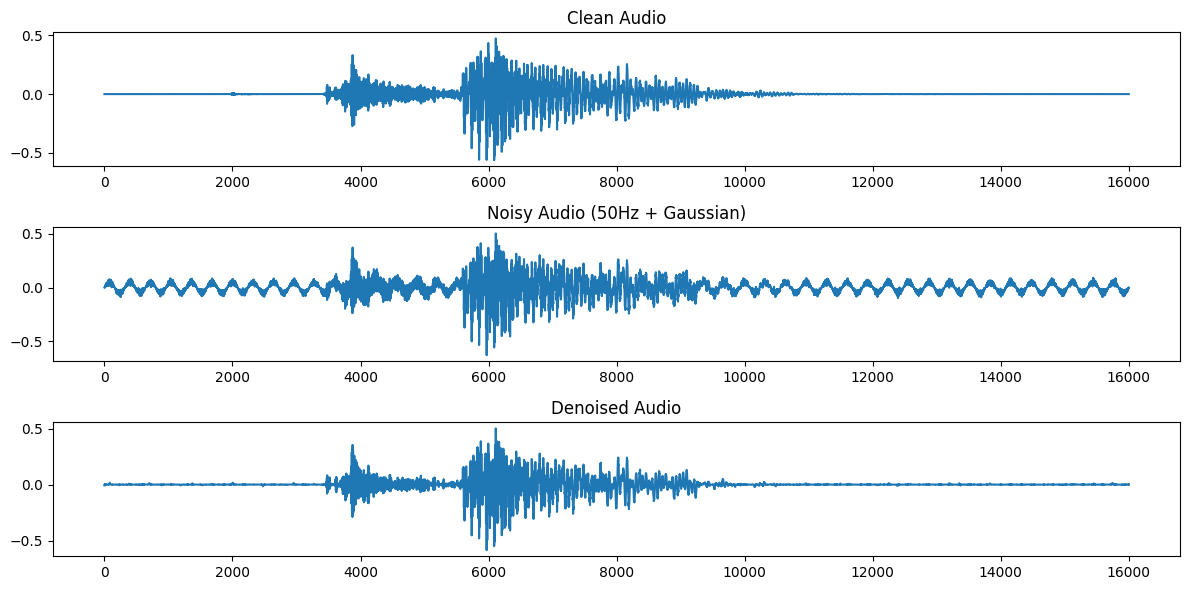

In [ ]:
import matplotlib.pyplot as plt

test_noisy = noisy_audio[12][np.newaxis, ..., np.newaxis]
test_clean = clean_audio[12]

denoised = autoencoder.predict(test_noisy).squeeze()

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Clean Audio")
plt.plot(test_clean)
plt.subplot(3, 1, 2)
plt.title("Noisy Audio (50Hz + Gaussian)")
plt.plot(test_noisy.squeeze())
plt.subplot(3, 1, 3)
plt.title("Denoised Audio")
plt.plot(denoised)
plt.tight_layout()
plt.show()

it looks decent ! it just seems like we're loosing a little low amplitude data.

### Test on requested audio

In [ ]:
import librosa

waveform, sr = librosa.load("/Voice 250528_184840.m4a", sr=16000)
waveform_noisy = add_50hz_noise(waveform)

<ipython-input-60-e2645d51dd6b>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sr = librosa.load("/Voice 250528_184840.m4a", sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


### PreProcessing 

In [ ]:
import numpy as np

def partition_non_overlapping(waveform, chunk_size=16000):
    
    num_chunks = int(np.ceil(len(waveform) / chunk_size))
    padded_length = num_chunks * chunk_size
    padded = np.pad(waveform, (0, max(0, padded_length - len(waveform))))
    return np.reshape(padded, (num_chunks, chunk_size))

def reconstruct_non_overlapping(chunks, original_length):
    return np.reshape(chunks, -1)[:original_length]

# 1. Partition into non-overlapping chunks
chunks = partition_non_overlapping(waveform_noisy)
print(f"Split into {len(chunks)} chunks of {chunks.shape[1]} samples each")

# 2. Process through model (add channel dimension)
chunks_processed = autoencoder.predict(chunks[..., np.newaxis])[..., 0]  # Remove channel dim

# 3. Reconstruct
denoised_audio = reconstruct_non_overlapping(chunks_processed, len(waveform))

Split into 12 chunks of 16000 samples each
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


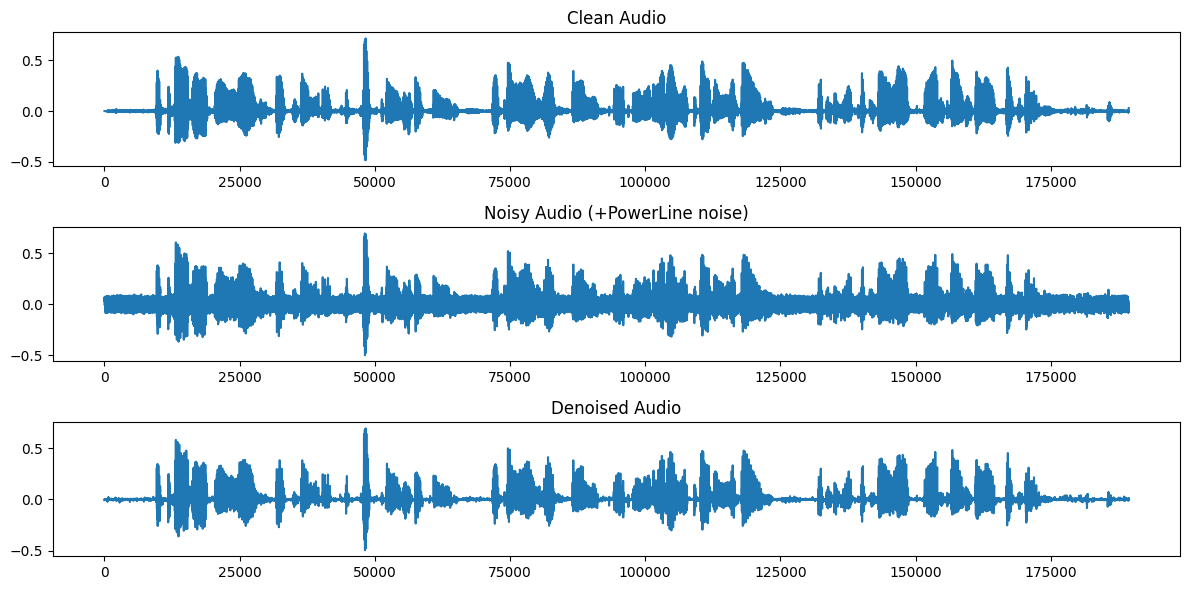

In [ ]:
test_noisy = waveform_noisy
test_clean = waveform

denoised = denoised_audio

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Clean Audio")
plt.plot(test_clean)
plt.subplot(3, 1, 2)
plt.title("Noisy Audio (+PowerLine noise)")
plt.plot(test_noisy.squeeze())
plt.subplot(3, 1, 3)
plt.title("Denoised Audio")
plt.plot(denoised)
plt.tight_layout()
plt.show()

it looks alright!<br>
let's apply an FIR filter now and compare the results.

### FIR filter

Before we start let's take a look at our original signals FFT and compare how FIR and IIR filters work on it

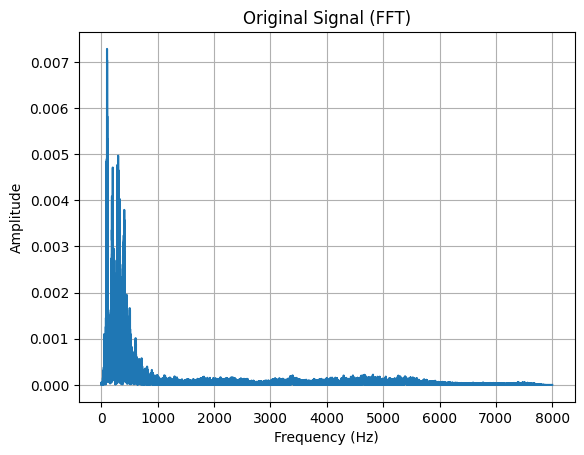

In [ ]:
plot_fft(waveform, fs, title="Original Signal (FFT)")

Split into 12 chunks of 16000 samples each


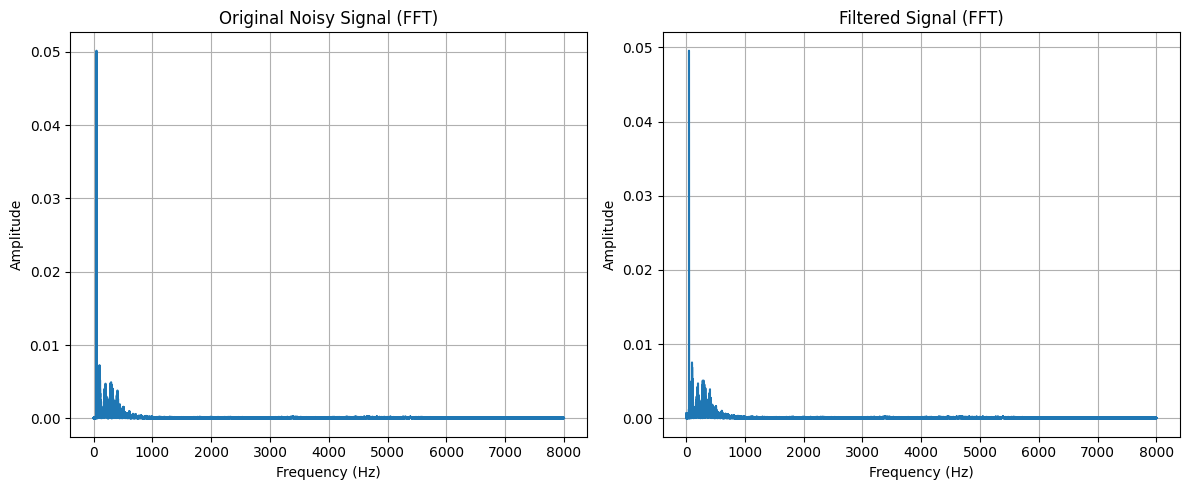

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from scipy.fft import fft, fftfreq

# FIR notch filter design
def design_fir_notch_filter(fs=16000, f_notch=50, bw=4, numtaps=301):
    nyq = fs / 2
    low = (f_notch - bw / 2) / nyq
    high = (f_notch + bw / 2) / nyq
    taps = firwin(numtaps, [low, high], pass_zero=True)
    return taps

# Apply FIR filter to each chunk
def apply_filter_to_chunks(chunks, taps):
    return np.array([lfilter(taps, 1.0, chunk) for chunk in chunks])

# Partition function
def partition_non_overlapping(waveform, chunk_size=16000):
    num_chunks = int(np.ceil(len(waveform) / chunk_size))
    padded_length = num_chunks * chunk_size
    padded = np.pad(waveform, (0, max(0, padded_length - len(waveform))))
    return np.reshape(padded, (num_chunks, chunk_size))

# Reconstruction function
def reconstruct_non_overlapping(chunks, original_length):
    return np.reshape(chunks, -1)[:original_length]

# Plot FFT
def plot_fft(signal, fs, title=""):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)[:N//2]
    amplitude = 2.0/N * np.abs(yf[0:N//2])

    plt.plot(xf, amplitude)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)

fs = 16000
t = np.arange(0, 2.0, 1/fs)

# 1. Partition into chunks
chunks = partition_non_overlapping(waveform_noisy, chunk_size=16000)
print(f"Split into {len(chunks)} chunks of {chunks.shape[1]} samples each")

# 2. Apply FIR notch filter to each chunk
taps = design_fir_notch_filter(fs=fs, f_notch=50)
chunks_filtered = apply_filter_to_chunks(chunks, taps)

# 3. Reconstruct
denoised_audio = reconstruct_non_overlapping(chunks_filtered, len(waveform_noisy))

# 4. Plot FFTs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_fft(waveform_noisy, fs, title="Original Noisy Signal (FFT)")

plt.subplot(1, 2, 2)
plot_fft(denoised_audio, fs, title="Filtered Signal (FFT)")

plt.tight_layout()
plt.show()


it looks like it's thinned it out the 50Hz , but not a good job ! let's implement the IIR

### IIR filter

Split into 12 chunks of 16000 samples each


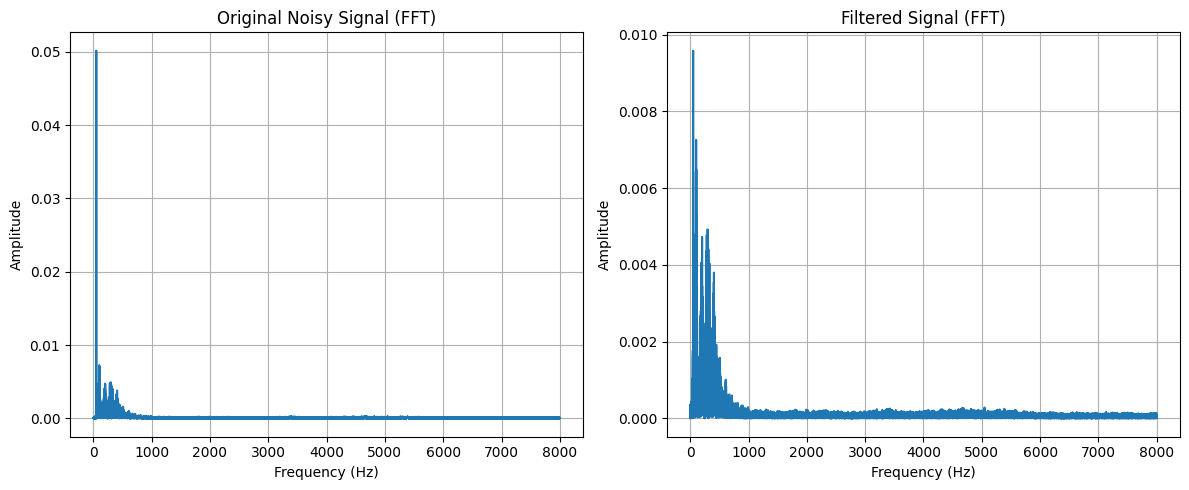

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter
from scipy.fft import fft, fftfreq

# Design IIR notch filter
def design_iir_notch_filter(fs=16000, f_notch=50, Q=30):
    w0 = f_notch / (fs / 2)  # Normalized frequency
    b, a = iirnotch(w0, Q)
    return b, a

# Apply IIR filter to each chunk
def apply_iir_filter_to_chunks(chunks, b, a):
    return np.array([lfilter(b, a, chunk) for chunk in chunks])

# Partition function
def partition_non_overlapping(waveform, chunk_size=16000):
    num_chunks = int(np.ceil(len(waveform) / chunk_size))
    padded_length = num_chunks * chunk_size
    padded = np.pad(waveform, (0, max(0, padded_length - len(waveform))))
    return np.reshape(padded, (num_chunks, chunk_size))

# Reconstruction function
def reconstruct_non_overlapping(chunks, original_length):
    return np.reshape(chunks, -1)[:original_length]

# Plot FFT
def plot_fft(signal, fs, title=""):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)[:N//2]
    amplitude = 2.0/N * np.abs(yf[0:N//2])

    plt.plot(xf, amplitude)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)

fs = 16000
t = np.arange(0, 2.0, 1/fs)

# 1. Partition into chunks
chunks = partition_non_overlapping(waveform_noisy, chunk_size=16000)
print(f"Split into {len(chunks)} chunks of {chunks.shape[1]} samples each")

# 2. Design and apply IIR notch filter
b, a = design_iir_notch_filter(fs=fs, f_notch=50, Q=30)
chunks_filtered = apply_iir_filter_to_chunks(chunks, b, a)

# 3. Reconstruct
denoised_audio = reconstruct_non_overlapping(chunks_filtered, len(waveform_noisy))

# 4. Plot FFTs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_fft(waveform_noisy, fs, title="Original Noisy Signal (FFT)")

plt.subplot(1, 2, 2)
plot_fft(denoised_audio, fs, title="Filtered Signal (FFT)")


plt.tight_layout()
plt.show()


looks much better than FIR.

---

## Decoding Implementation

In the code below, we first read the audio file, then normalize the signal before multiplying it by 100. Normalization is essential because directly multiplying the raw audio samples by 100 can cause two main issues. First, the least significant bits (LSBs) may all become zero since multiplying by 100 can produce only even numbers, which have an LSB of zero. Normalization prevents this issue by scaling the audio samples to a standard range before amplification. Second, without normalization, some sample values may exceed the allowable range for their data type, causing overflow and distortion.

Since the LSB extraction requires integer sample amplitudes, the floating-point audio data is rounded to the nearest integer after amplification. In digital audio, even numbers have an LSB of 0, while odd numbers have an LSB of 1. Knowing that each group of 8 bits corresponds to an ASCII character, the bits are grouped accordingly, converted to characters, and concatenated to reconstruct the hidden message.

In [ ]:
import numpy as np 
from scipy.io import wavfile
import matplotlib.pyplot as plt  
# reading the audio
sample_rate , audio = wavfile.read("100-2625.wav")
audio_float = audio.astype(np.float32)
# normalize and ampliy the audio 
audio_norm = audio_float / np.max(np.abs(audio_float))
audio_amplified = audio_norm * 100
audio_data = np.round(audio_amplified).astype(np.int16)
# decoding the hidden message 
bit_number = int (len(audio_data)/2625)
bits= np.zeros(bit_number,dtype=int)
bit_index=0
for i in range (2624,len(audio_data),2625): 
    if (audio_data[i]%2==0):
        bits[bit_index] = 0
    else:
        bits[bit_index]=1
    bit_index=bit_index+1

# printing the hidden message 

for i in range (0 , len(bits),8):
    byte = bits[i:i+8]
    message = ''.join(str(int(b)) for b in byte)
    char = chr(int(message,2))
    print(char,end  = '')

        

Signals & System

#### Decoding with noisy background

In this section, we address the problem of decoding a hidden message embedded within a noisy audio signal. By analyzing the signal in the frequency domain using the Fast Fourier Transform (FFT), we observed the presence of two prominent noise frequencies. To mitigate these, we designed two notch filters, each targeting one of the identified noise components.

However, practical filters are not ideal, and their frequency response does not completely attenuate undesired frequencies to zero. As a result, applying a notch filter introduces changes in the frequency domain that can inadvertently affect other components of the signal. This is particularly problematic in our case, as the hidden message is embedded using Least Significant Bit (LSB) steganography, which is highly sensitive to even the smallest amplitude variations.

Increasing the quality factor (Q) of the notch filters sharpens their frequency selectivity but also risks distorting other parts of the signal or failing to sufficiently remove the noise. To address this, we applied two notch filters in series, each tuned carefully with an appropriate Q factor to strike a balance between effective noise reduction and preservation of the LSB information.

After iterative adjustment and testing, this approach yielded the most accurate recovery of the hidden message from the noisy audio.

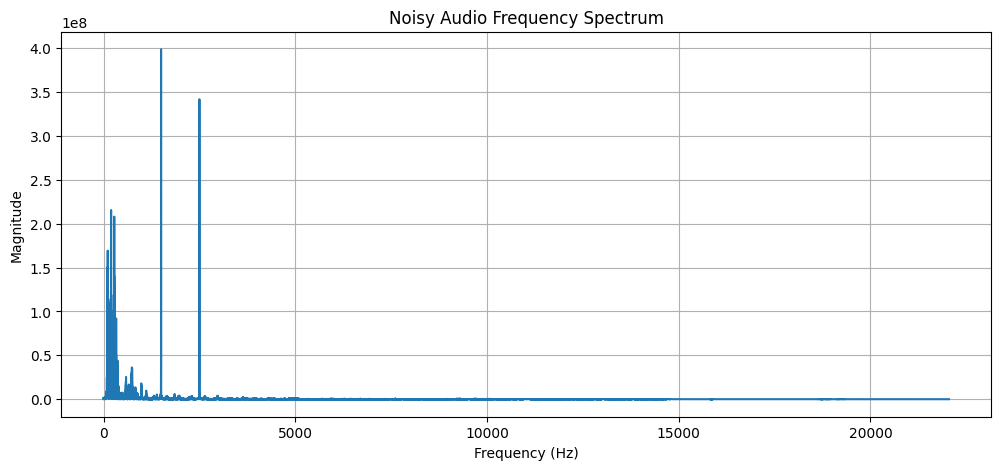

Detected noise frequencies: [2500.05    1500.05625]


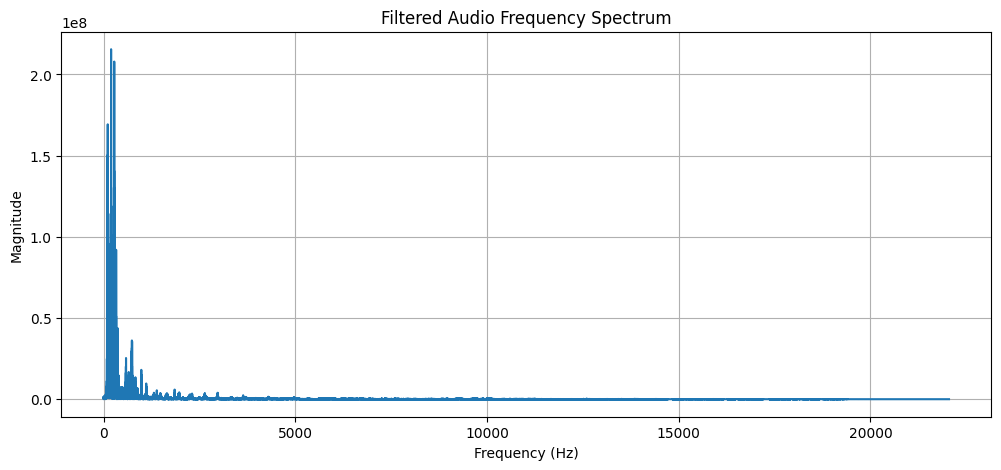

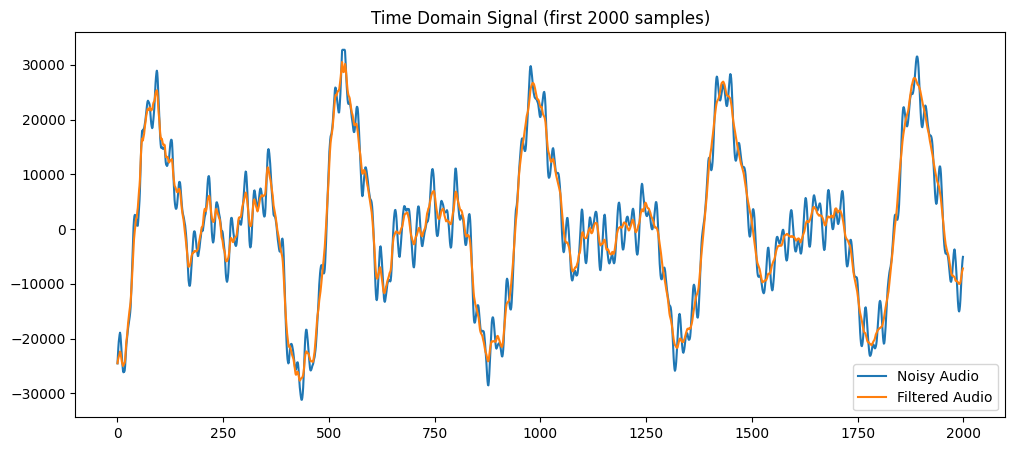


Decoded message:
SignalS &¦Cystem


In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt

sample_rate, noisy_audio = wavfile.read("100-2625-noisy.wav")

# converting to float32 if it is needed for the processing 
if noisy_audio.dtype != np.float32:
    noisy_audio = noisy_audio.astype(np.float32)

# getting fft of the noisy audio 
fft_data_noisy = np.fft.rfft(noisy_audio)
freqs = np.fft.rfftfreq(len(noisy_audio), 1/sample_rate)
fft_magnitude = np.abs(fft_data_noisy)

# plot noisy audion spectrum 
plt.figure(figsize=(12, 5))
plt.plot(freqs, fft_magnitude)
plt.title("Noisy Audio Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()
# we found out that we should filter two frequencies

# fing the two frequencies we should filter 
magnitude_no_dc = fft_magnitude.copy()
magnitude_no_dc[0] = 0
top2_idx = magnitude_no_dc.argsort()[-2:]
noise_freqs = freqs[top2_idx]
print(f"Detected noise frequencies: {noise_freqs}")

# designing the notch filter 
Q1 = 350  # for the smooth
filtered_audio1 = noisy_audio.copy()

for f0 in noise_freqs:
    b, a = iirnotch(w0=f0/(sample_rate/2), Q=Q1)
    filtered_audio1 = filtfilt(b, a, filtered_audio1)

fft_data_filtered1 = np.fft.rfft(filtered_audio1)
fft_magnitude_filtered = np.abs(fft_data_filtered1)

Q2 = 350 
filtered_audio = filtered_audio1.copy()

for f0 in noise_freqs:
    b, a = iirnotch(w0=f0/(sample_rate/2), Q=Q2)
    filtered_audio = filtfilt(b, a, filtered_audio)

# FFT of filtered audio
fft_data_filtered = np.fft.rfft(filtered_audio)
fft_magnitude_filtered = np.abs(fft_data_filtered)

# plot filtered audio spectrum
plt.figure(figsize=(12, 5))
plt.plot(freqs, fft_magnitude_filtered)
plt.title("Filtered Audio Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(noisy_audio[:2000], label='Noisy Audio')
plt.plot(filtered_audio[:2000], label='Filtered Audio')
plt.title("Time Domain Signal (first 2000 samples)")
plt.legend()
plt.show()

# normalize and amplify the audio
audio_norm = filtered_audio / np.max(np.abs(filtered_audio))
audio_amplified = audio_norm * 100
audio_data = np.round(audio_amplified).astype(np.int16)

# decode hidden message
bit_number = len(audio_data) // 2625
bits = np.zeros(bit_number, dtype=int)
bit_index = 0
for i in range(2624, len(audio_data), 2625):
    bits[bit_index] = 0 if audio_data[i] % 2 == 0 else 1
    bit_index += 1

message = ''
for i in range(0, len(bits), 8):
    byte = bits[i:i+8]
    char = chr(int(''.join(str(b) for b in byte), 2))
    message += char

print("\nDecoded message:")
print(message)
